** Homework 1 **

Name: Jenny Zeng

ID#: 52082740

# Problem 1: Python & Data Exploration
In this problem, we will explore some basic statistics and visualizations of an example data set. First,
download the zip file for Homework 1, which contains some course code (the mltools directory)
and the “Fisher iris” data set, and load the latter into Python:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

# load the text file
iris = np.genfromtxt("data/iris.txt", delimiter=None)  
Y = iris[:, -1]  # target value is the last column
X = iris[:, 0:-1]  # features are the other columns

The Iris data consist of four real-valued features used to predict which of three types of iris flower
was measured (a three-class classification problem).

## (a) Use X.shape[1] to get the number of features, and X.shape[0] to get the number of data points.

In [2]:
features = X.shape[1]
dataPoints = X.shape[0]
print("Num of features: ", features)
print("Num of data points: ", dataPoints)

Num of features:  4
Num of data points:  148


### (b) For each feature, plot a histogram (“plt.hist”) of the data values

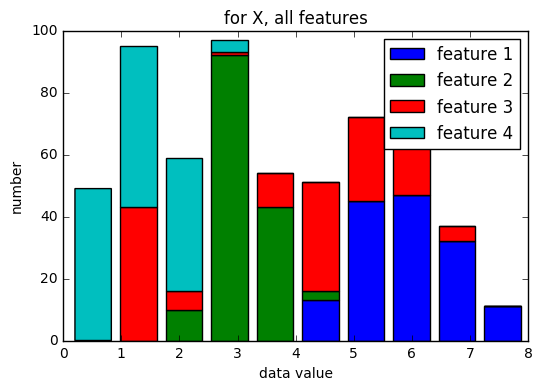

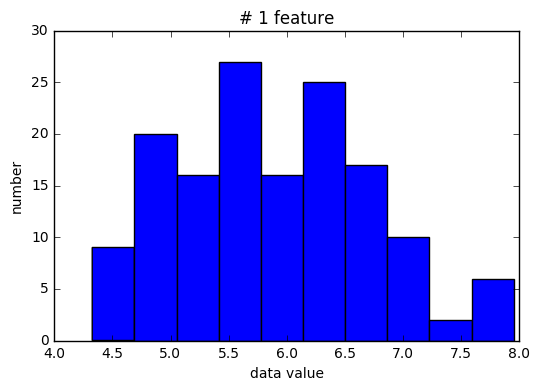

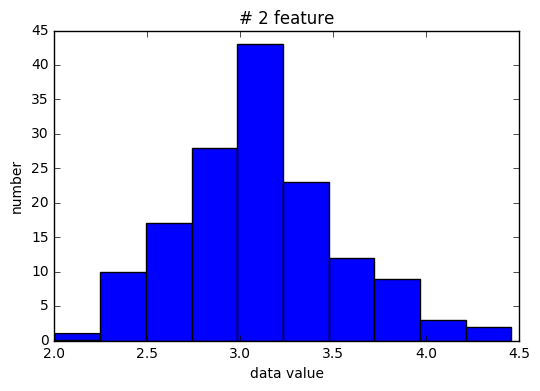

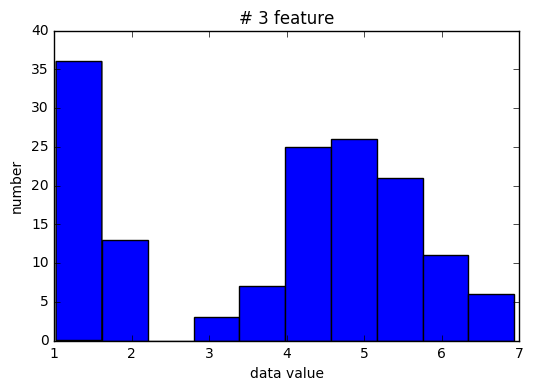

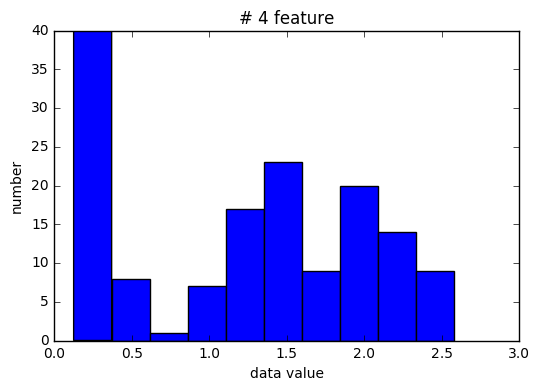

In [3]:
plt.title("for X, all features")
# for X, all features
plt.hist(X, histtype='barstacked',
        label=['feature 1', 'feature 2', 'feature 3', 'feature 4']) 
plt.xlabel('data value')
plt.ylabel('number')
plt.legend()
plt.show()

for i in range (features):
    plt.title("# "+ str(i+1) + " feature")
    f = X[:, i]
    plt.hist(f)
    plt.xlabel('data value')
    plt.ylabel('number')
    plt.show()

## (c) Compute the mean & standard deviation of the data points for each feature (np.mean, np.std)

In [4]:
# compute mean of each feature
mean = np.mean(X, axis=0)
print("mean: ", mean)

# compute standard deviation of each feature
std = np.std(X, axis=0)
print("standard deviation: ", std)

mean:  [ 5.90010376  3.09893092  3.81955484  1.25255548]
standard deviation:  [ 0.83340207  0.43629184  1.75405711  0.75877246]


## (d) For each pair of features (1,2), (1,3), and (1,4), plot a scatterplot
(see "plt.plot" or "plt.scatter") of the feature values, colored according to their target value (class). (For example, plot all data points with y = 0 as blue, y = 1 as green, etc.)

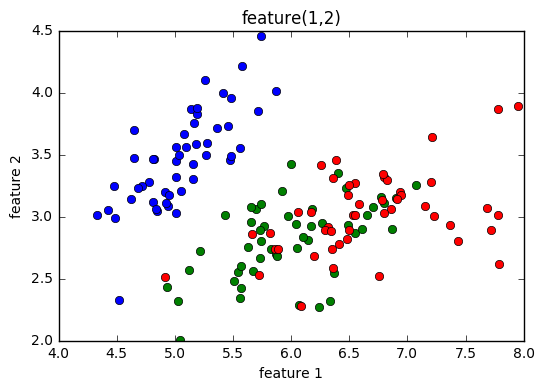

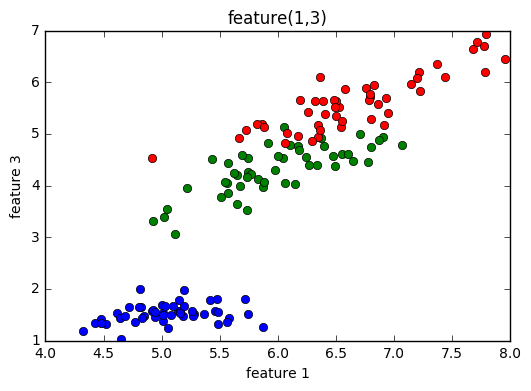

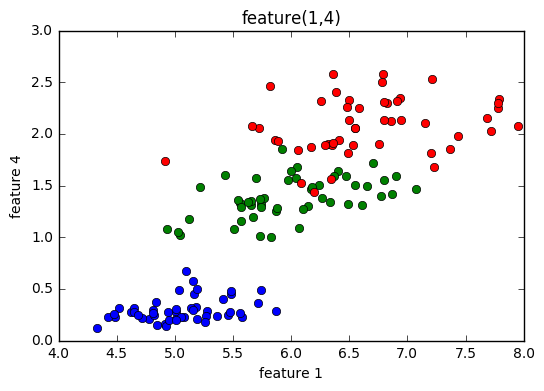

In [5]:
colors = ['b','g','r']

for i in range(1,4):
    for c in np.unique(Y):
        plt.plot( X[Y==c,0], X[Y==c,i], 'o',
        color=colors[int(c)])
        
    plt.title("feature(1,{})".format(i+1))
    plt.xlabel("feature 1")
    plt.ylabel("feature {}".format(i+1))
    plt.show()

# Problem 2: kNN predictions
In this problem, you will continue to use the Iris data and explore a KNN classifier using provided
knnClassify python class.
First, we will shuffle and split the data into training and test subsets:
```Python
iris = np.genfromtxt("data/iris.txt",delimiter=None) # load the data
Y = iris[:,-1]
X = iris[:,0:-1]
# Note: indexing with ":" indicates all values (in this case, all rows);
# indexing with a value ("0", "1", "-1", etc.) extracts only that one value (here, columns);
# indexing rows/columns with a range ("1:-1") extracts any row/column in that range.

import mltools as ml
# We'll use some data manipulation routines in the provided class code
# Make sure the "mltools" directory is in a directory on your Python path, e.g.,
# export PYTHONPATH=${PYTHONPATH}:/path/to/parent/dir
# or add it to your path inside Python:
# import sys
# sys.path.append('/path/to/parent/dir/');

X,Y = ml.shuffleData(X,Y); # shuffle data randomly
# (This is a good idea in case your data are ordered in some pathological way,
# as the Iris data are)
Xtr,Xva,Ytr,Yva = ml.splitData(X,Y, 0.75); # split data into 75/25 train/validation
```

Learner Objects Our learners (the parameterized functions that do the prediction) will be de-
fined as python objects, derived from either an abstract classifier or abstract regressor class. The
abstract base classes have a few useful functions, such as computing error rates or other measures
of quality. More importantly, the learners will all follow a generic behavioral pattern, allowing us
to train the function on a data set (i.e., set the parameters of the model to perform well on those
data), and make predictions on a data set.
So, you can build and “train” a kNN classifier on Xtr,Ytr and make predictions on some data
Xte with it using e.g.,
```Python
knn = ml.knn.knnClassify() # create the object and train it
knn.train(Xtr, Ytr, K) # where K is an integer, e.g. 1 for nearest neighbor prediction
YvaHat = knn.predict(Xva) # get estimates of y for each data point in Xva

# Alternatively, the constructor provides a shortcut to "train":
knn = ml.knn.knnClassify( Xtr, Ytr, K );
YvaHat = predict( knn, Xva );
```
If your data are 2D, you can visualize a data set and a classifier’s decision regions using e.g.,

```Python
ml.plotClassify2D( knn, Xtr, Ytr ) # make 2D classification plot with data (Xtr,Ytr)
```

This function plots the training data, then calls knn’s predict function on a densely spaced grid
of points in the 2D space, and uses this to produce the background color. Calling the function with
knn=None will plot only the data.



## (a) Modify the code listed above to use only the first two features of X 
(e.g., let X be only the first two columns of iris, instead of the first four), and visualize (plot) the classification boundary for varying values of K = [1, 5, 10, 50] using plotClassify2D.

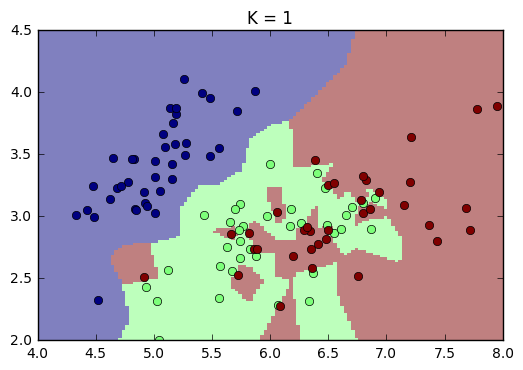

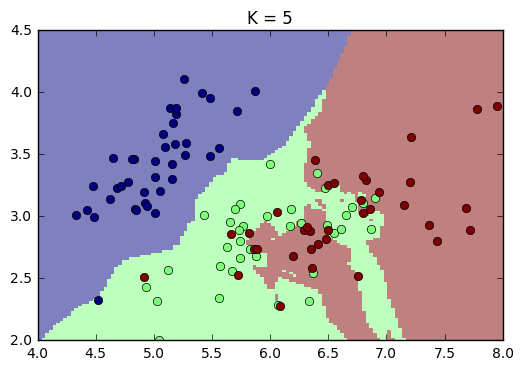

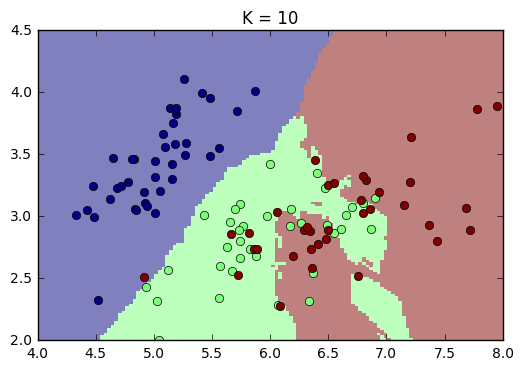

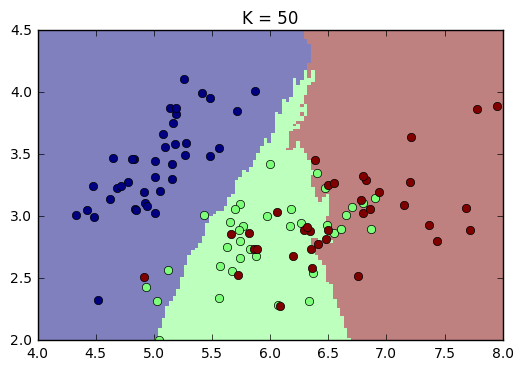

In [6]:
iris = np.genfromtxt("data/iris.txt",delimiter=None) # load the data
Y = iris[:,-1]
X = iris[:,0:2] # use only the first two cols


import mltools as ml
# shuffle data randomly
X,Y = ml.shuffleData(X,Y); 
# split data into 75/25 train/validation
Xtr,Xva,Ytr,Yva = ml.splitData(X,Y, 0.75) 

K = [1, 5, 10, 50]
for k in K: 
    # create the object and train it
    knn = ml.knn.knnClassify() 
    # where K is an integer, e.g. 1 for nearest neighbor prediction
    knn.train(Xtr, Ytr, k) 
    # get estimates of y for each data point
    YvaHat = knn.predict(Xva) 
    
    # make 2D classification plot with data (Xtr,Ytr)
    ml.plotClassify2D(knn, Xtr, Ytr) 
    plt.title("K = "+ str(k))
    plt.show()

## (b) Again using only the first two features, compute the error rate (number of misclassifications)
on both the training and test data as a function of K = [1, 2, 5, 10, 50, 100, 200]. You can do
this most easily with a for-loop:

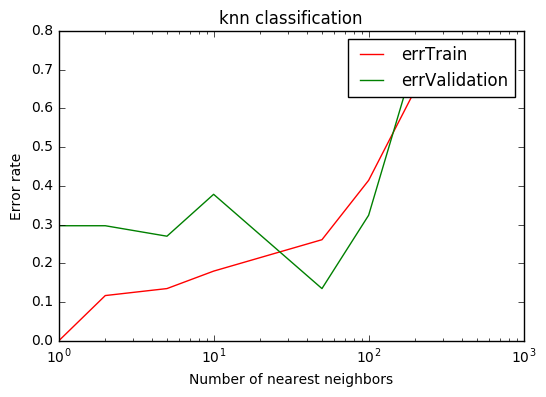

In [7]:
K=[1,2,5,10,50,100,200]
errTrain = [0]*len(K)
errValidation = [0]*len(K)
for i,k in enumerate(K):
    learner = ml.knn.knnClassify(Xtr, Ytr, k)
    # complete code to predict results on training data
    Yhat = learner.predict(Xtr) 
    errTrain[i] = sum([Ytr[j] != Yhat[j] 
                       for j in range (len(Ytr))])/len(Ytr)
    # " " to count what fraction of predictions are wrong
    # repeat prediction / error evaluation for test data
    YvaHat = learner.predict(Xva)
    errValidation[i] = sum([Yva[j]!=YvaHat[j] 
                            for j in range (len(Yva))])/len(YvaHat)
    
plt.semilogx(K, errTrain, color="r",label = "errTrain")
plt.semilogx(K, errValidation, color="g", label="errValidation")
plt.xlabel('Number of nearest neighbors')
plt.ylabel('Error rate')
plt.title("knn classification")
plt.legend()
plt.show()
# " " to average and plot results on semi-log scale

Plot the resulting error rate functions using a semi-log plot (“semilogx”), with training error
in red and test error in green. Based on these plots, what value of K would you recommend?

**Answer** : since we get the lowest validation error rate arround K = 50, I would recommend value of K to be 50

# Problem 3: Bayes Classifiers
In order to reduce my email load, I decide to implement a machine learning algorithm to decide
whether or not I should read an email, or simply file it away instead. To train my model, I obtain
the following data set of binary-valued features about each email, including whether I know the
author or not, whether the email is long or short, and whether it has any of several key words,
along with my final decision about whether to read it (y = +1 for “read”, y = −1 for “discard”).

| x1 | x2 | x3 |x4|x5|y|
| ------| ------ | ------ |-----|-----|---|
| know author?| is long?| has ‘research’ |has ‘grade’ |has ‘lottery’| ⇒ read?|
|0|0 | 1 |1| 0| -1|
|1| 1| 0| 1| 0| -1|
|0| 1| 1| 1| 1| -1|
|1| 1| 1| 1| 0| -1|
|0| 1| 0| 0| 0| -1|
|1| 0| 1| 1| 1| 1|
|0| 0| 1| 0| 0| 1|
|1| 0| 0| 0| 0| 1|
|1| 0| 1| 1| 0| 1|
|1| 1| 1| 1| 1| -1|

In the case of any ties, we will prefer to predict class +1.
I decide to try a naïve Bayes classifier to make my decisions and compute my uncertainty.

## (a) Compute all the probabilities necessary for a naïve Bayes classifier,
i.e., the class probability $p(y)$ and all the individual feature probabilities $p(x_i|y)$, for each class y and feature $x_i$

$p(y=1) = \frac{4}{10} = \frac{2}{5};\quad p(y=-1)= 1-p(y=1) = \frac{3}{5};$

$p(x_1=1|y=-1) =\frac{1}{2};\quad p(x_2=1|y=-1)=\frac{5}{6};$

$p(x_3=1|y=-1)=\frac{2}{3};\quad p(x_4=1|y=-1)=\frac{5}{6};$

$p(x_5=1|y=-1)=\frac{1}{3};$

$p(x_1=1|y=1) =\frac{3}{4};\quad p(x_2=1|y=1)=\frac{0}{4};$

$p(x_3=1|y=1)=\frac{3}{4};\quad p(x_4=1|y=1)=\frac{1}{2};$

$p(x_5=1|y=1)=\frac{1}{4};$

## (b) Which class would be predicted for $\underline{x}= (0 0 0 0 0)$? What about for $\underline{x} = (1 1 0 1 0)$?


\begin{eqnarray*}
p(y=-1)p(x=00000|y=-1) &=& \prod_{i=1}^{5}p(y=-1)p(x_i|y=-1)\\
&=& \frac{3}{5} \cdot \frac{1}{2} \cdot \frac{1}{6} \cdot \frac{1}{3} \cdot \frac{1}{6} \cdot \frac{2}{3}\\
&=& \frac{1}{540}\\
&=& .19\%
\end{eqnarray*}

\begin{eqnarray*}
p(y=1)p(x=00000|y=1) &=& \prod_{i=1}^{5}p(y=1)p(x_i|y=1)\\
&=& \frac{2}{5}\cdot \frac{1}{4} \cdot \frac{4}{4} \cdot \frac{1}{4} \cdot \frac{1}{2} \cdot \frac{3}{4}\\
&=& \frac{3}{320}\\
&=& .94\%
\end{eqnarray*}

since $.94\% > .19\%$, class "read"(1) will be predicted for $\underline{x}= (0 0 0 0 0)$



\begin{eqnarray*}
p(y=-1)p(x=11010|y=-1) &=& \prod_{i=1}^{5}p(y=-1)p(x_i|y=-1)\\
&=& \frac{3}{5}\cdot \frac{1}{2} \cdot \frac{5}{6} \cdot \frac{1}{3} \cdot \frac{5}{6} \cdot \frac{2}{3}\\
&=& 4.6\%
\end{eqnarray*}



\begin{eqnarray*}
p(y=1)p(x=11010|y=1) &=& \prod_{i=1}^{5}p(y=1)p(x_i|y=1)\\
&=& \frac{2}{5}\cdot \frac{3}{4} \cdot \frac{0}{4} \cdot \frac{1}{4} \cdot \frac{1}{2} \cdot \frac{3}{4}\\
&=& 0\%
\end{eqnarray*}


Since $4.6\% > 0\%$, class "discard(-1) will be predicted for $\underline{x} = (1 1 0 1 0)$



## (c) Compute the posterior probability that $y = +1$ given the observation $\underline{x} = (1 1 0 1 0)$.

\begin{eqnarray*}
p(y=1|x=11010) &=& \frac{p(x=11010|y=1)p(y=1)}{p(x=11010)}\\
&=& \frac{0\cdot \frac{2}{5}}{\frac{3}{5}\cdot \frac{1}{2} \cdot \frac{5}{6} \cdot \frac{1}{3} \cdot \frac{5}{6} \cdot \frac{2}{3} + \frac{2}{5}\cdot \frac{3}{4} \cdot \frac{0}{4} \cdot \frac{1}{4} \cdot \frac{1}{2} \cdot \frac{3}{4}}\\
&=& 0\%
\end{eqnarray*}

## (d) Why should we probably not use a “joint” Bayes classifier 
(using the joint probability of the features $x$, as opposed to a naïve Bayes classifier) for these data?

**Answer**: 
In naïve Bayes, it is assumed that features are independent given class and the number of parameters are small in the model. In "joint" Bayes classifier, features are dependent and the number of parameters is much larger, which is $2^5$. Based on the small data set given, we may get many 0s for joint probabilities. However, though the probilibty of the joint probability of features are 0 here, it is probably not true that they will never occur.
Hence, we should probably not use a "joint" Bayes classifier.

## (e) Suppose that, before we make our predictions, we lose access to my address book, so that we cannot tell whether the email author is known. Should we re-train the model, and if so, how?
(e.g.: how does the model, and its parameters, change in this new situation?) Hint: what will
the naïve Bayes model over only features $x_2 \ldots x_5$ look like, and what will its parameters be?

We will have to remove the probability $p(x_i|y)$ for y= 1 or -1 from the model, and other parts (other features, and other parameters) will remain the same. It is not necessary to re-train the model because we can change $p(x_i|y)$ to be always equal to 1 then it will not affect the result. 